#### Packages and functions

In [0]:
import pandas as pd
import numpy as np
import pyecharts as pye

from plotnine import *
from functools import reduce
from pyspark.sql import Window, DataFrame

import pyspark.sql.functions as F
import pyspark.sql.types as T

--------------------------------------------------------------------------- 
 ModuleNotFoundError Traceback (most recent call last)
 <command-1420700135059442> in <module> 
 1 import pandas as pd
 2 import numpy as np
 ----> 3 import pyecharts as pye
 4 
 5 from plotnine import * 

 ModuleNotFoundError : No module named 'pyecharts'

In [0]:
%run ./functions

#### Base check out data

- Built using the `wide_tables()` function in `functions`.
- Not sure how this will need to be used for future data.
- See `multiple_book_challenge` for the data compilation that is needed to go into `wide_tables()`

In [0]:
spark.sql("use library_g25")
dat = spark.table('wcheckouts_checkout')
display(dat)

BibNum,MinDate,MaxCheckouts,TitleCollection,Author,Publisher,PublicationYear,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,m16,m17,m18,m19,m20,m21,m22,m23,m24,m25,m26,m27,m28,m29,m30,m31,m32,m33,m34,m35,m36,m37,m38,m39,m40,m41,m42,m43
116633,201709,38,Scott standard postage stamp catalogue.,null,Amos Media,null,23,18,22,12,25,25,38,14,13,10,12,6,11,9,8,3,17,15,20,20,10,10,18,10,8,22,7,6,6,13,0,0,0,0,0,3,6,2,8,12,11,4,8
136493,201709,515,A wrinkle in time / Madeleine L'Engle.,"L'Engle, Madeleine","Farrar, Straus and Giroux,",[1962],50,43,43,52,78,349,515,424,404,373,352,317,68,37,31,23,34,21,17,20,20,31,16,17,24,21,15,22,11,24,0,0,0,0,0,6,5,11,4,10,13,8,9
177076,201709,1,"The Anchor Bible. Introd., translation, and notes.",null,"Doubleday,",1964-19<91 >,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
321133,201709,2,The Sacred books of the East / translated by various oriental scholars and edited by F. Max Müller.,null,"Motilal Banarsidass,",1962-1966.,0,1,2,0,2,0,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
362380,201709,1,Country home.,null,"[Special Interest Publications],",[1983-],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
516177,201709,2,Novyĭ mir.,null,Izvesti︠i︡a Sovety deputatov Trud︠i︡ashchikhs︠i︡a SSSR,null,0,0,0,0,1,0,1,1,2,0,0,1,0,0,0,0,0,0,1,2,0,0,0,1,1,0,1,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
516789,201709,3,Christmas ideas.,null,Special Interest Publications],null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
533404,201709,14,The best American poetry.,null,"Charles Scribner's Sons,",c1988-,9,6,12,9,9,4,4,14,2,6,8,4,6,8,10,8,4,3,6,10,1,6,4,9,10,11,4,9,7,5,0,0,0,0,0,0,0,0,0,0,0,2,1
562947,201709,8,Inostranna︠i︡a literatura.,null,Izd-vo Izvesti︠i︡a Sovetov narodnykh deputatov SSSR,null,2,6,4,2,4,6,2,3,1,1,8,1,4,3,1,4,2,3,1,4,4,2,4,4,2,2,3,5,4,7,0,0,0,0,0,0,0,0,0,0,0,0,0
587544,201709,1,Building ideas.,null,[Special Interest Publications],1973-2000.,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Compile all months (model data)

Final `library_g25.model_months_all` is what I will use for my model.

In [0]:
m2 = build_month(2, dat)
m3 = build_month(3, dat)
m4 = build_month(4, dat)
m5 = build_month(5, dat)
m6 = build_month(6, dat)
m7 = build_month(7, dat)
m8 = build_month(8, dat)
m9 = build_month(9, dat)
m10 = build_month(10, dat)
dfs = [m2,m3,m4, m5, m6, m7, m8, m9, m10]
# https://stackoverflow.com/questions/37612622/spark-unionall-multiple-dataframes
# https://www.geeksforgeeks.org/reduce-in-python/
# https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.DataFrame.unionAll.html#:~:text=unionAll,-DataFrame.&text=Return%20a%20new%20DataFrame%20containing,to%20UNION%20ALL%20in%20SQL.
# https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.DataFrame.unionByName.html
df = reduce(DataFrame.unionAll, dfs)
df.write.mode('overwrite').saveAsTable("library_g25.model_months_all")
display(df)

BibNum,number_months_available,total_checkouts,previous_quarter_checkouts,previous_month_checkouts,current_month_checkouts,total_collection_central,previous_quarter_collection_central,previous_month_collection_central,current_month_collection_central,total_collection_other,previous_quarter_collection_other,previous_month_collection_other,current_month_collection_other,target
116633,2,41,41,23,18,184,184,91,93,269,269,131,138,22
136493,2,93,93,50,43,10,10,5,5,94,94,47,47,43
177076,2,2,2,1,1,134,134,67,67,0,0,0,0,0
321133,2,1,1,0,1,92,92,46,46,0,0,0,0,2
362380,2,0,0,0,0,70,70,35,35,0,0,0,0,0
516177,2,0,0,0,0,162,162,81,81,0,0,0,0,0
516789,2,0,0,0,0,76,76,38,38,0,0,0,0,0
533404,2,15,15,9,6,53,53,26,27,57,57,25,32,12
562947,2,8,8,2,6,157,157,78,79,0,0,0,0,4
587544,2,0,0,0,0,66,66,33,33,0,0,0,0,0


#### Machine Learning

> Using standard 5-fold cross-validation, no practical effect of the dependencies within the data could be found, regarding whether the final error is under- or overestimated. On the contrary, last block evaluation tends to yield less robust error measures than cross-validation and blocked cross-validation. [ref](https://www.sciencedirect.com/science/article/abs/pii/S0020025511006773)

> However, for non-stationary time-series, they recommend instead using a variation on Hold-Out, called Rep-Holdout. In Rep-Holdout, a point `a` is chosen in the time-series `Y` to mark the beginning of the testing data. The point `a` is determined to be within a window. [ref](https://www.semanticscholar.org/paper/Evaluating-time-series-forecasting-models%3A-An-study-Cerqueira-Torgo/1ef6b9c734ceb775bc6055af93918b5db5bf190d)

- [code](https://github.com/vcerqueira/performance_estimation)
- [Good ML on time series post](https://towardsdatascience.com/time-series-machine-learning-regression-framework-9ea33929009a)
- [Good time series and machine learning slides](http://di.ulb.ac.be/map/gbonte/ftp/time_ser.pdf)
- [My other notes](https://github.com/BYUI451/spark_guide/tree/main/MLlib)

In [0]:
# The pyspark.ml methods used in this example.
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, VectorIndexer
# https://spark.apache.org/docs/latest/ml-classification-regression.html
from pyspark.ml.regression import GBTRegressor, DecisionTreeRegressor, RandomForestRegressor, FMRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator


In [0]:
%run ./functions

In [0]:
print(df.columns)

['BibNum', 'number_months_available', 'total_checkouts', 'previous_quarter_checkouts', 'previous_month_checkouts', 'current_month_checkouts', 'total_collection_central', 'previous_quarter_collection_central', 'previous_month_collection_central', 'current_month_collection_central', 'total_collection_other', 'previous_quarter_collection_other', 'previous_month_collection_other', 'current_month_collection_other', 'target']

##### Define ML columns

In [0]:
# column names
dropcols = ['BibNum']
categoricalCols = []
numericCols = ['number_months_available', 'total_checkouts', 'previous_quarter_checkouts', 'previous_month_checkouts', 'current_month_checkouts', 'total_collection_central',  'previous_quarter_collection_central', 'previous_month_collection_central', 'current_month_collection_central', 'total_collection_other', 'previous_quarter_collection_other',
 'previous_month_collection_other', 'current_month_collection_other']
targetCol = 'target' 
featureInputs = [c + "OHE" for c in categoricalCols] + numericCols # we are adding the one hot encoder label (OHE) to the column names because that is done with our econder transform
print(featureInputs)

['number_months_available', 'total_checkouts', 'previous_quarter_checkouts', 'previous_month_checkouts', 'current_month_checkouts', 'total_collection_central', 'previous_quarter_collection_central', 'previous_month_collection_central', 'current_month_collection_central', 'total_collection_other', 'previous_quarter_collection_other', 'previous_month_collection_other', 'current_month_collection_other']

##### Spit data

In [0]:
# https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.DataFrame.randomSplit.html
trainDF, testDF = df.randomSplit([0.70, 0.30], seed=36)
print(trainDF.cache().count()) # Cache because accessing training data multiple times
print(testDF.count())

2923
1212

In [0]:
# https://stackoverflow.com/questions/47637760/stratified-sampling-with-pyspark
# Taking 70% of each `number_months_available`
train = df.sampleBy("number_months_available", fractions={2: 0.7, 3: 0.7, 4: 0.7, 5: 0.7, 6:0.7, 7:0.7, 8:0.7, 9:0.7, 10:0.7}, seed=36)
test = df.subtract(train)
print(train.count()) # Cache because accessing training data multiple times
print(test.count())

2900
1212

In [0]:
df.groupBy("number_months_available").count().withColumnRenamed('count', 'full').join(
  train.groupBy("number_months_available").count().withColumnRenamed('count', 'strata'), 'number_months_available'
).join(
trainDF.groupBy("number_months_available").count().withColumnRenamed('count', 'random'), 'number_months_available'
).show()



+-----------------------+----+------+------+
number_months_available|full|strata|random|
+-----------------------+----+------+------+
 2| 491| 344| 333|
 3| 484| 340| 337|
 4| 475| 340| 341|
 5| 467| 322| 334|
 6| 456| 329| 340|
 7| 449| 314| 325|
 8| 432| 324| 320|
 9| 429| 293| 300|
 10| 429| 294| 293|
+-----------------------+----+------+------+

##### Build pipeline

In [0]:
vecAssembler = VectorAssembler(inputCols=featureInputs, outputCol="features")
gbt = GBTRegressor(maxDepth=8, leafCol="leafId", labelCol = targetCol)
rf = RandomForestRegressor(numTrees=10, maxDepth=5, labelCol = targetCol)

my_seed = 1936
rf.setSeed(my_seed)
gbt.setSeed(my_seed)


Out[35]: GBTRegressor_691a87a5f02b

In [0]:
pipeline_gbt = Pipeline(stages=[vecAssembler, gbt]) # Define the pipeline based on the stages created in previous steps that works all the way to the model.
Model_gbt = pipeline_gbt.fit(train) # Define the pipeline model.
predDF_gbt = Model_gbt.transform(test) # Apply the pipeline model to the test dataset.

##### Evaluate performance

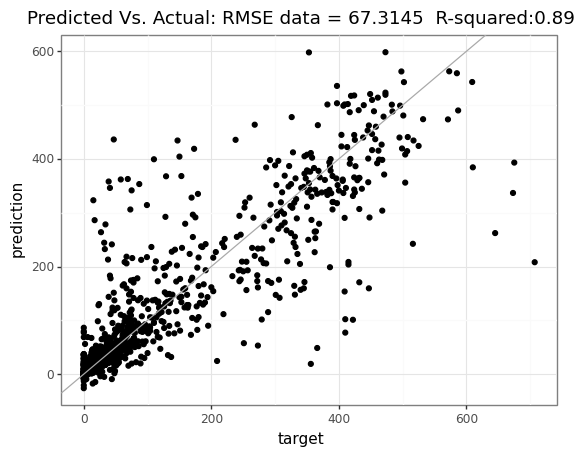

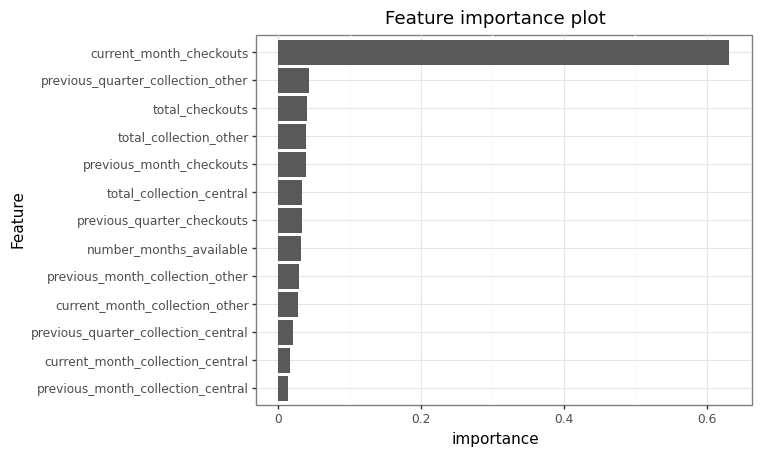

Out[22]:

,variable,importance,variable_cat
4,current_month_checkouts,0.631519,current_month_checkouts
10,previous_quarter_collection_other,0.042760,previous_quarter_collection_other
1,total_checkouts,0.041011,total_checkouts
9,total_collection_other,0.039295,total_collection_other
3,previous_month_checkouts,0.039052,previous_month_checkouts
5,total_collection_central,0.033935,total_collection_central
2,previous_quarter_checkouts,0.033240,previous_quarter_checkouts
0,number_months_available,0.031985,number_months_available
11,previous_month_collection_other,0.029389,previous_month_collection_other
12,current_month_collection_other,0.027549,current_month_collection_other


In [0]:
print(model_results(predDF_gbt,labelCol = targetCol))
importance_plot(Model_gbt)

#### Export Model

In [0]:
# read pickled model via pipeline api
from pyspark.ml.pipeline import PipelineModel
from pyspark2pmml import PMMLBuilder

In [0]:
Model_gbt.write().overwrite().save("dbfs:/FileStore/library/model_gbt_hathaway")
train.write.saveAsTable("library_g25.train_hathaway")

##### Export PMML File

In [0]:
# This is the same thing as Model_gbt
model_load = PipelineModel.load("dbfs:/FileStore/library/model_gbt_hathaway") # spark API format
train = spark.table("library_g25.train_hathaway")
pmmlBuilder = PMMLBuilder(spark, train, model_load) # databricks defaults our spark session to `spark`.
pmmlBuilder.buildFile("/dbfs/FileStore/library/library.pmml") # File API format

##### Downloading

[Data Thirst](https://datathirst.net/) created [DBFS-Explorer](https://datathirst.net/projects/dbfs-explorer/) that works on Mac or Windows.  You can see their source code on [GitHub](https://github.com/DataThirstLtd/DBFS-Explorer).  They seem to work quite easilty to provide a GUI file explorer to our files on Databricks.

You could also use the [Databricks CLI](https://docs.databricks.com/dev-tools/cli/index.html)

#### Notes on Export

- [pyspark.ml.util.GeneralMLWriter](https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.ml.util.GeneralMLWriter.html)

1. [jpmml-sparkml](https://github.com/jpmml/jpmml-sparkml)
2. [PySpark2PMML](https://github.com/jpmml/pyspark2pmml)
3. [Deploying Apache Spark ML pipeline models on Openscoring REST web service](https://openscoring.io/blog/2020/02/16/deploying_sparkml_pipeline_openscoring_rest/)

##### Openscoring

- https://github.com/openscoring/openscoring
- https://openscoring.io/blog/2020/02/16/deploying_sparkml_pipeline_openscoring_rest/
- https://github.com/openscoring/openscoring-python
- https://github.com/openscoring/openscoring-docker
- https://github.com/openscoring/papis.io